In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import bigrams
from nltk import ngrams
from nltk import FreqDist
from nltk.corpus import stopwords
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests

In [32]:
df1 = pd.read_csv('./dataset/files/01.csv', encoding = 'utf-8', sep=';')
df2 = pd.read_csv('./dataset/files/02.csv', encoding = 'utf-8', sep=';')
df3 = pd.read_csv('./dataset/files/03.csv', encoding = 'utf-8', sep=';')
df4 = pd.read_csv('./dataset/files/04.csv', encoding = 'utf-8', sep=';')
df5 = pd.read_csv('./dataset/files/05.csv', encoding = 'utf-8', sep=';')
df6 = pd.read_csv('./dataset/files/06.csv', encoding = 'utf-8', sep=';')
df7 = pd.read_csv('./dataset/files/07.csv', encoding = 'utf-8', sep=';')
df8 = pd.read_csv('./dataset/files/08.csv', encoding = 'utf-8', sep=';')
df9 = pd.read_csv('./dataset/files/09.csv', encoding = 'utf-8', sep=';')
df10 = pd.read_csv('./dataset/files/10.csv', encoding = 'utf-8', sep=';')
df11 = pd.read_csv('./dataset/files/11.csv', encoding = 'utf-8', sep=';')
df12 = pd.read_csv('./dataset/files/12.csv', encoding = 'utf-8', sep=';')
df13 = pd.read_csv('./dataset/files/13.csv', encoding = 'utf-8', sep=';')
df14 = pd.read_csv('./dataset/files/14.csv', encoding = 'utf-8', sep=';')
df15 = pd.read_csv('./dataset/files/15.csv', encoding = 'utf-8', sep=';')
df16 = pd.read_csv('./dataset/files/16.csv', encoding = 'utf-8', sep=';')
df17 = pd.read_csv('./dataset/files/17.csv', encoding = 'utf-8', sep=';')
df18 = pd.read_csv('./dataset/files/18.csv', encoding = 'utf-8', sep=';')
df19 = pd.read_csv('./dataset/files/19.csv', encoding = 'utf-8', sep=';')
df20 = pd.read_csv('./dataset/files/20.csv', encoding = 'utf-8', sep=';')

result1 = df1.append(df2)
result2 = result1.append(df3)
result3 = result2.append(df4)
result4 = result3.append(df5)
result5 = result4.append(df6)
result6 = result5.append(df7)
result7 = result6.append(df8)
result8 = result7.append(df9)
result9 = result8.append(df10)
result10 = result9.append(df11)
result11 = result10.append(df12)
result12 = result11.append(df13)
result13 = result12.append(df14)
result14 = result13.append(df15)
result15 = result14.append(df16)
result16 = result15.append(df17)
result17 = result16.append(df18)
result18 = result17.append(df19)
result_final = result18.append(df20)

dataset = result_final

dataset = dataset.dropna(axis = 0)
dataset.isnull().sum()
dataset = dataset.reset_index()
# type(dataset)
len(dataset.index)

49156

In [3]:
dataset.to_csv('./dataset.csv', encoding='utf-8-sig', index=None, header=True, sep=';')

In [4]:
dataset = pd.read_csv('./dataset.csv', encoding = 'utf-8', sep=';')

# search_values = ['PRÉ', 'CANDIDATURA',  'EXPERIÊNCIA', 'ADMINISTRATIVA', 'ÚRSULA VIDAL']
search_values_comments = ['roubou', 'datena', 'Datena', 'roubar', 'vergon', 'casa', 'respiradores', 'barbalho', 'Barbalho', 'Helder', 'Hélder', 'Governador', 'governador', 'PF', 'federal', 'na casa', 'polícia', 'policia', 'governo']
search_comments = dataset.loc[dataset.comentario.str.contains(' | '.join(search_values_comments))]

search_values_post = ['governador', 'Governador', 'Helder', 'barbalho', 'Barbalho', 'PF', 'Federal', 'Datena', 'respiradores', 'governo']
search_post = dataset.loc[dataset.postagem.str.contains(' | '.join(search_values_post))]
# df[df.name.str.contains('|'.join(search_values ))]
search = search_post.append(search_comments)
search.drop_duplicates(subset ='comentario', keep = False, inplace = True) 
search


,index,postagem,nome,comentario,curtidas,data,link
417,437,Assista ao vivo a coletiva do Governador Helde...,Juscelina Vasconcelos,"Todos nós somos sujeitos a lei , nenhum cargo ...",10,10/6 22:4 há 4 horas,https://m.facebook.com/story.php?story_fbid=31...
420,440,Assista ao vivo a coletiva do Governador Helde...,Raymundo Marinho Neto,As investigações agora que começaram é vocês d...,14,10/6 22:4 há 4 horas,https://m.facebook.com/story.php?story_fbid=31...
422,442,Assista ao vivo a coletiva do Governador Helde...,Denize Cunha,E o empréstimo internacional é pra que mesmo??,4,10/6 22:4 há 4 horas,https://m.facebook.com/story.php?story_fbid=31...
426,446,Assista ao vivo a coletiva do Governador Helde...,Reginaldo Cardoso Jr.,Quero saber quando ele vai pagar a primeira pa...,1,10/6 22:4 há 3 horas,https://m.facebook.com/story.php?story_fbid=31...
519,539,Assista ao vivo a coletiva do Governador Helde...,Bruno Capello,"Sai fora, DOL. Sem credibilidade nenhuma!",18,10/6 22:4 há 4 horas,https://m.facebook.com/story.php?story_fbid=31...
...,...,...,...,...,...,...,...
49053,319,Atenção Prefeitura Municipal Ministério Públi...,Adrianoo Silvaa,Em vez da polícia fechar comércio deveria tá ...,0,11/6 3:5 7 de jun às 21:45,https://m.facebook.com/story.php?story_fbid=36...
49109,376,#CORONAVÍRUS Agora são 4 352 casos confirmado...,Esmeralda Santos,Eta que a polícia federal precisa urgentemente...,1,11/6 3:5 7 de jun às 17:51,https://m.facebook.com/story.php?story_fbid=36...
49137,404,#CORONAVÍRUS Só nesta sexta-feira (5) foram re...,Margo Jardim,"Quem vence é a maioria,não estavam lutando pel...",0,11/6 3:5 6 de jun às 16:25,https://m.facebook.com/story.php?story_fbid=35...
49138,405,#CORONAVÍRUS,Joaci Cunha Cunha,Eta polícia federal muito bem parabéns pelo se...,0,11/6 3:5 6 de jun às 17:15,https://m.facebook.com/story.php?story_fbid=35...


In [5]:
search.to_csv('./search.csv', encoding='utf-8-sig', index=None, header=True, sep=';')

In [6]:
dataset = search

In [7]:
# Lista de stopWords
stop_words = pd.read_csv('./dataset/stopwords.txt', sep=" ", header=None)
# stop_words = nltk.corpus.stopwords.words('portuguese')
# Lista de Comentários
dataset_phrases = dataset['comentario']
# dataset_phrases[0]
# dataset['comentario'].apply(lambda x: [item for item in dataset_phrases if item not in stop_words])

In [8]:
# Remover stopWords de comentários
def removeStopWords(text):
    new_dataset_phrases = []
    for phrase in text:
        x = phrase.lower()
        remove_stop = [w for w in x.split() if w not in stop_words.values]
        remove_stop = [x for x in remove_stop if 'http' not in x ]
#         remove_stop = [w for w in x.split() if w not in stop_words]
        new_dataset_phrases.append(remove_stop)
    return new_dataset_phrases

In [9]:
# print(removeStopWords(dataset_phrases))
dataset_no_stopwords = removeStopWords(dataset_phrases)
# dataset_no_stopwords

In [10]:
def toStemmer(text):
    stemmer = nltk.stem.RSLPStemmer()
    phrases_stemmer = []
    for phrases in text:
        with_stemmer = [ str(stemmer.stem(p)) for p in phrases.split() if p not in stop_words.values]
        phrases_stemmer.append(with_stemmer)
    return phrases_stemmer

In [11]:
# dataset_no_stopwords = toStemmer(dataset_phrases)

In [12]:
def listWords(text):
    all_words = []
    for word in text:
        all_words.extend(word)
    return all_words
        

In [13]:
# dataset_no_stopwords

In [14]:
list_of_words = listWords(dataset_no_stopwords)

In [15]:
# list_of_words

In [16]:
wrd = [w for w in list_of_words if w not in stop_words]
# wrd


In [17]:
def associacoes(grams, n):
    n_grams = list(ngrams(wrd, n))
    n_grams = FreqDist(n_grams)
    n_grams = n_grams.most_common(1000)
    return n_grams

In [18]:
ass_two = associacoes(wrd, 2)
for two in ass_two:
    print(two[0][0] + ",", two[0][1] + ",", two[1])

polícia, federal, 93
governo, federal, 63
fica, casa, 59
ficar, casa, 56
pf, casa, 34
governo, estado, 32
helder, barbalho, 28
dentro, casa, 27
operação, pf, 25
750, mil, 23
casa, governador, 23
casa, caiu, 22
quero, saber, 21
dinheiro, público, 20
governador, helder, 20
fiquem, casa, 19
hélder, barbalho, 18
graças, deus, 17
rei, norte, 16
álcool, gel, 15
diário, online, 15
povo, paraense, 15
cadê, matéria, 14
dinheiro, respiradores, 14
estado, pará, 14
federal, casa, 14
parabéns, governador, 14
fique, casa, 14
governo, estadual, 14
prefeito, governador, 13
bom, dia, 13
mi, mi, 13
pf, hoje, 13
dinheiro, governo, 13
hospital, campanha, 12
caixa, térmica, 12
pf, pf, 12
governo, pará, 12
sair, casa, 12
sai, casa, 12
governo, federal., 12
governador, hélder, 12
fake, news, 11
governadores, prefeitos, 11
deixa, povo, 11
covid, 19, 11
alcides, oliveira, 11
pf, investigar, 11
gestão, administrativa, 10
garrafas, pet, 10
pf, cola, 10
bolsa, família, 10
nesse, momento, 10
fala, pf, 10
matéria, 

sistema, saúde,, 3
governador, mandar, 3
povo, fala, 3
fala, governador, 3
governador, vagabundo, 3
precisa, sair, 3
pessoas, querem, 3
3, meses, 3
bom, governo, 3
atual, governo., 3
governo, genocida, 3
prevalecer, conceitos, 3
conceitos, nação, 3
nação, raça, 3
valores, individuais, 3
centralizado, figura, 3
trabalhei, casa, 3
governador, prefeito., 3
pessoas, ruas,, 3
casa, bem, 3
adely, santos, 3
povo, ficar, 3
dizer, governador, 3
falta, amor, 3
pera, pera, 3
cobrar, prefeito, 3
onde, governador, 3
governador, fala, 3
povo, noção, 3
jardim, secult,, 3
daria, comprar, 3
povo, governador, 3
paga, aluguel, 3
saem, casa, 3
deputado, federal, 3
casa, pessoas, 3
saindo, casa, 3
mil, respiradores, 3
casa, so, 3
querem, povo, 3
leitos, respiradores, 3
p, estado, 3
defender, governo, 3
bem, casa, 3
certeza, vamos, 3
novo, presidente, 3
comprar, respiradores, 3
governo, anterior, 3
meia, dúzia, 3
vergonha, governo, 3
casa, repouso, 3
juliana, solizs, 3
casa, casa, 3
pagar, contas, 3
passand

In [19]:
ass_tree = associacoes(wrd, 3)
for tree in ass_tree:
    print(tree[0][0] + ",", tree[0][1] + ",", tree[0][2] + ",", tree[1])

polícia, federal, casa, 12
mi, mi, mi, 9
junior, lucena, lucena, 9
lucena, lucena, junior, 9
casa, peter, cassol,, 9
peter, cassol,, secretário-adjunto, 9
cassol,, secretário-adjunto, gestão, 9
secretário-adjunto, gestão, administrativa, 9
gestão, administrativa, secretaria, 9
administrativa, secretaria, saúde, 9
tita, o., tita, 8
reyson, nogueira, tj, 8
pf, casa, governador, 8
pf, pf, pf, 8
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk, kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk, kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk, 7
ronaldo, anibal, sossi, 6
748, mil, casa, 6
governo, federal, mandou, 6
dinheiro, governo, federal, 6
governador, helder, barbalho, 6
nonato, brito, brito, 5
#stfvergonhanacional, #stfvergonhanacional, #stfvergonhanacional, 5
ana, c., arroyo, 5
polícia, federal, investigar, 5
victor, thiago, lima, 5
fala, pf, hoje, 5
casa, rei, norte, 5
notícia, pf, casa, 5
polícia, federal, apreendeu, 5
federal, apreendeu, r$, 5
apreendeu, r$, 748, 5
r$, 748, mil, 5
mil, ca

pagamos, conta, atualmente., 2
conta, atualmente., segundo,, 2
atualmente., segundo,, petrobras, 2
segundo,, petrobras, condições, 2
petrobras, condições, isso,, 2
condições, isso,, tal, 2
isso,, tal, media, 2
tal, media, benéfica, 2
media, benéfica, ponto, 2
benéfica, ponto, vista, 2
ponto, vista, econômico., 2
vista, econômico., tipo, 2
econômico., tipo, medida, 2
tipo, medida, –, 2
medida, –, populista, 2
–, populista, –, 2
populista, –, favoreceria, 2
–, favoreceria, população, 2
favoreceria, população, curto, 2
população, curto, prazo,, 2
curto, prazo,, prejudicaria, 2
prazo,, prejudicaria, empresa, 2
prejudicaria, empresa, sociedade, 2
empresa, sociedade, médio, 2
sociedade, médio, longo, 2
médio, longo, prazo., 2
longo, prazo., nesse, 2
prazo., nesse, caso,, 2
nesse, caso,, gasolina, 2
caso,, gasolina, barata, 2
gasolina, barata, obtida, 2
barata, obtida, custas, 2
obtida, custas, prejuízos, 2
custas, prejuízos, investidores., 2
prejuízos, investidores., ponto, 2
investidores., 

comprado, pc;, 5), 2
reais;, 8), escândalo, 2
8), escândalo, cestas, 2
escândalo, cestas, básicas, 2
básicas, 138, reais;, 2
138, reais;, 9), 2
reais;, 9), escândalo, 2
aprovado, unanimidade, alepa;, 2
unanimidade, alepa;, 10), 2
alepa;, 10), escândalo, 2
milhões, times, futebol, 2
times, futebol, plena, 2
futebol, plena, pandemia;, 2
plena, pandemia;, 11), 2
pandemia;, 11), escândalo, 2
investigar, caso, respiradores;, 2
caso, respiradores;, 12), 2
respiradores;, 12), escândalo, 2
300, sei, quê;, 2
sei, quê;, 13), 2
quê;, 13), escândalo, 2
70, mil, mês;, 2
mil, mês;, 14), 2
mês;, 14), escândalo, 2
marcadores, livros, ouro, 2
livros, ouro, prata;, 2
ouro, prata;, 15, 2
prata;, 15, escândalo, 2
15, escândalo, 600, 2
escândalo, 600, mil, 2
600, mil, fafá, 2
mil, fafá, belém, 2
fafá, belém, cantar, 2
belém, cantar, meia, 2
cantar, meia, dúzia, 2
meia, dúzia, hinos, 2
dúzia, hinos, círio., 2
hinos, círio., governo, 2
círio., governo, colecionado, 2
governo, colecionado, escândalos, 2
colec

In [20]:
ass_four = associacoes(wrd, 4)
for four in ass_four:
    print(four[0][0] + ",", four[0][1] + ",", four[0][2] + ",", four[0][3] + ",", four[1])

junior, lucena, lucena, junior, 9
casa, peter, cassol,, secretário-adjunto, 9
peter, cassol,, secretário-adjunto, gestão, 9
cassol,, secretário-adjunto, gestão, administrativa, 9
secretário-adjunto, gestão, administrativa, secretaria, 9
gestão, administrativa, secretaria, saúde, 9
kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk, kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk, kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk, kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk, 6
mi, mi, mi, mi, 6
pf, pf, pf, pf, 6
polícia, federal, apreendeu, r$, 5
apreendeu, r$, 748, mil, 5
r$, 748, mil, casa, 5
748, mil, casa, peter, 5
mil, casa, peter, cassol,, 5
4), escândalo, álcool, gel, 5
pc;, 5), escândalos, hospitais, 5
5), escândalos, hospitais, campanha;, 5
escândalos, hospitais, campanha;, 6), 5
hospitais, campanha;, 6), escândalos, 5
campanha;, 6), escândalos, respiradores;, 5
6), escândalos, respiradores;, 7), 5
escândalos, respiradores;, 7), escândalo, 5
respiradores;, 7), escândalo, lanches, 5
7), 

médio, longo, prazo., nesse, 2
longo, prazo., nesse, caso,, 2
prazo., nesse, caso,, gasolina, 2
nesse, caso,, gasolina, barata, 2
caso,, gasolina, barata, obtida, 2
gasolina, barata, obtida, custas, 2
barata, obtida, custas, prejuízos, 2
obtida, custas, prejuízos, investidores., 2
custas, prejuízos, investidores., ponto, 2
prejuízos, investidores., ponto, tipo, 2
investidores., ponto, tipo, política, 2
ponto, tipo, política, torna, 2
tipo, política, torna, empresa, 2
política, torna, empresa, ineficiente,, 2
torna, empresa, ineficiente,, afastando, 2
empresa, ineficiente,, afastando, investimentos,, 2
ineficiente,, afastando, investimentos,, portanto,, 2
afastando, investimentos,, portanto,, reduzindo, 2
investimentos,, portanto,, reduzindo, receita, 2
portanto,, reduzindo, receita, estatal., 2
reduzindo, receita, estatal., médio, 2
receita, estatal., médio, prazo,, 2
estatal., médio, prazo,, empresa, 2
médio, prazo,, empresa, aumentar, 2
prazo,, empresa, aumentar, preços, 2
empresa, a

investigar, caso, respiradores;, 12), 2
caso, respiradores;, 12), escândalo, 2
respiradores;, 12), escândalo, flores., 2
quase, 300, sei, quê;, 2
300, sei, quê;, 13), 2
sei, quê;, 13), escândalo, 2
quê;, 13), escândalo, caminhão, 2
alugado, 70, mil, mês;, 2
70, mil, mês;, 14), 2
mil, mês;, 14), escândalo, 2
mês;, 14), escândalo, compra, 2
ouro, marcadores, livros, ouro, 2
marcadores, livros, ouro, prata;, 2
livros, ouro, prata;, 15, 2
ouro, prata;, 15, escândalo, 2
prata;, 15, escândalo, 600, 2
15, escândalo, 600, mil, 2
escândalo, 600, mil, fafá, 2
600, mil, fafá, belém, 2
mil, fafá, belém, cantar, 2
fafá, belém, cantar, meia, 2
belém, cantar, meia, dúzia, 2
cantar, meia, dúzia, hinos, 2
meia, dúzia, hinos, círio., 2
dúzia, hinos, círio., governo, 2
hinos, círio., governo, colecionado, 2
círio., governo, colecionado, escândalos, 2
governo, colecionado, escândalos, falta, 2
colecionado, escândalos, falta, transparência,, 2
escândalos, falta, transparência,, parlamento, 2
falta, transpa

In [21]:
# list_of_words
wrd_dist = FreqDist(list(list_of_words))
wrd_ranking = wrd_dist.most_common(1000)
wrd_ranking
for wrd in wrd_ranking:
    print(wrd[0] + ",", four[1])

casa, 1
governo, 1
governador, 1
povo, 1
pf, 1
dinheiro, 1
pessoas, 1
polícia, 1
federal, 1
deus, 1
presidente, 1
ficar, 1
bem, 1
pará, 1
estado, 1
fica, 1
respiradores, 1
sabe, 1
assim, 1
fala, 1
bom, 1
vírus, 1
brasil, 1
vcs, 1
falar, 1
helder, 1
família, 1
saúde, 1
hélder, 1
barbalho, 1
sim, 1
dol, 1
parabéns, 1
vamos, 1
dia, 1
saber, 1
onde, 1
querem, 1
mil, 1
cadê, 1
bolsonaro, 1
dizer, 1
verdade, 1
pro, 1
precisa, 1
ir, 1
sei, 1
sair, 1
quero, 1
prefeito, 1
hoje, 1
vem, 1
filho, 1
falta, 1
população, 1
trabalhar, 1
falou, 1
culpa, 1
p, 1
hora, 1
mundo, 1
vou, 1
vida, 1
conta, 1
covid, 1
matéria, 1
silva, 1
melhor, 1
números, 1
milhões, 1
né, 1
so, 1
ñ, 1
pandemia, 1
dias, 1
pessoa, 1
mortes, 1
hospital, 1
escândalo, 1
nesse, 1
ja, 1
rua, 1
tempo, 1
trabalho, 1
dentro, 1
pior, 1
menos, 1
casos, 1
operação, 1
deixa, 1
parte, 1
público, 1
reais, 1
acha, 1
boa, 1
momento, 1
fez, 1
filhos, 1
sai, 1
vergonha, 1
tanto, 1
dar, 1
diário, 1
parece, 1
existe, 1
favor, 1
país, 1
anos, 1
cert

In [22]:
postagens = list(dataset['postagem'])
ranking_post = FreqDist(postagens)
ranking_pp = ranking_post.most_common(1000)
number_special = int(1000 - len(ranking_pp))
ranking_postagens = [''] * number_special
ranking_postagens = ranking_pp + ranking_postagens
len(ranking_postagens)

1000

In [23]:
mor_love = list(dataset['curtidas'])
oaiwdl = mor_love.sort(reverse=True)
oaiwdl
print(oaiwdl)

None


In [24]:
final_results = pd.DataFrame()
final_results['Ranking de palavras'] = wrd_ranking
final_results['Ranking de Associações de duas palavras'] = ass_two
final_results['Ranking de Associações de tres palavras'] = ass_tree
final_results['Postagem Mais comentadas'] = ranking_postagens

In [25]:
for postagem in ranking_postagens:
    print(postagem[0] + ", Comentários: ",postagem[1])

O presidente chamou os manifestantes e críticos ao governo de ‘terroristas’  ‘viciados’  ‘bando de marginais’ e ‘marginais de preto’ , Comentários:  266
Assista ao vivo a coletiva do Governador Helder Barbalho , Comentários:  229
O governo teria ainda usado critérios não técnicos na distribuição de verbas de publicidade , Comentários:  202
Bolsonaro chamou novamente de "marginais" integrantes de grupos contrários ao seu governo , Comentários:  160
Bolsonaro afirmou que os manifestantes que se opõem a seu governo "geralmente são marginais  maconheiros  desocupados que não sabem o que é economia  o que é trabalhar para ganhar seu pão de cada dia" , Comentários:  139
O governo cortou o orçamento apesar da fila de espera no programa que atende famílias mais pobres , Comentários:  117
Na avaliação da cúpula da pasta  Estados e municípios estariam manipulando informações para se beneficiarem de recursos do governo federal , Comentários:  110
O governador se defendeu e negou ser amigo do empr

Confira todos os detalhes :( Mais 1 óbito hoje, Comentários:  2
Ordem é para asfaltar mais de 17km do Posto 70 , Comentários:  2
#CORONAVÍRUS  Acompanhados por psicólogo  pacientes podem realizar videochamadas para familiares  diariamente  Ação  além de humanizar  oferta conforto e ajuda na recuperação, Comentários:  2
Maioria foi fechada por sonegar impostos ou comercializar  sem autorização  produtos que se tornaram essenciais para prevenir a contaminação pelo novo coronavírus  como respiradores  testes  álcool em gel e máscaras de proteção facial , Comentários:  1
Pela proposta  governo terá de divulgar informações com detalhes sobre casos  capacidade do sistema de saúde e uso de recursos , Comentários:  1
A quantia apreendida na operação de hoje da PF é de cerca de R$ 1 milhão , Comentários:  1
Hamilton Mourão preside o Conselho da Amazônia do governo federal  A operação Verde Brasil 2 é coordenada pela vice-presidência da República em apoio aos órgãos de controle ambiental e de se

IndexError: string index out of range

In [26]:
final_results.to_csv('./final_results.csv', encoding='utf-8-sig', index=None, header=True, sep=';')

In [27]:
ddadawdaw = [[w] for w in list_of_words]
# ddadawdaw

In [28]:
# dataset_no_stopwords

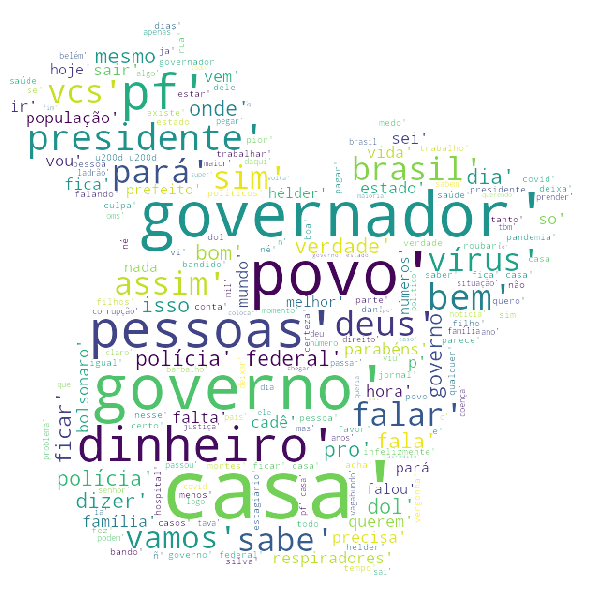

In [29]:
text = str(ddadawdaw)
text
# mask = np.array(Image.open(requests.get('./dataset/image.png', stream=True).raw))
mask = np.array(Image.open('./dataset/image.png'))

stopwords = set(STOPWORDS)
newStopword = ['aircraft', 'pilot', 'en route', 'airport']
stopwords.update(newStopword)

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(mask):
    word_cloud = WordCloud( background_color="rgba(255, 255, 255, 0)", mode="RGBA", stopwords=stopwords, mask=mask)
    word_cloud.generate(text)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig('./graph.png', transparent=True)
    plt.show()
#Run the following to generate your wordcloud
generate_wordcloud(mask)

In [ ]:
emoction_training = pd.read_csv('./dataset/Tweets_Mg.csv',encoding='utf-8')

In [ ]:
# emoction_training[emoction_training.Classificacao == 'Neutro'].count()

In [ ]:
# separar frases e suas classes
frases_classificar = emoction_training["Text"].values
# frases_classificar
classes_classificar = emoction_training["Classificacao"].values
# classes_classificar

In [ ]:
# Agora, vamos treinar o modelo usando a abordagem Bag of Words e o algoritmo Naive Bayes Multinomial
#    - Bag of Words, na prática, cria um vetor com cada uma das palavras do texto completo da base,
#      depois, calcula a frequência em que essas palavras ocorrem em uma data sentença, para então
#      classificar/treinar o modelo
#    - Exemplo HIPOTÉTICO de três sentenças vetorizadas "por palavra" e classificadas baseada na
#      frequência de suas palavras:
#         {0,3,2,0,0,1,0,0,0,1, Positivo}
#         {0,0,1,0,0,1,0,1,0,0, Negativo}
#         {0,1,1,0,0,1,0,0,0,0, Neutro}
#    - Olhando para esses vetores, meu palpite é que as palavras nas posições 2 e 3 são as com maior
#      peso na determinação de a que classe pertence cada uma das três sentenças avaliadas
#    - A função fit_transform faz exatamente esse processo: ajusta o modelo, aprende o vocabulário,
#      e transforma os dados de treinamento em feature vectors, a.k.a. vetor com frequêcia das palavras

# vectorizer = CountVectorizer(analyzer = "word")
# freq_tweets = vectorizer.fit_transform(frases_classificar)

# modelo = MultinomialNB()
# modelo.fit(freq_tweets, classes_classificar)


# Com o modelo de Bigrams, em lugar de vetorizar o texto "por palavra", vamos vetoriza-lo por cada
# "duas palavras", tipo: Eu gosto de São Paulo => { eu gosto, gosto de, de são, são paulo }
vectorizer = CountVectorizer(ngram_range = (1, 2))
freq_tweets = vectorizer.fit_transform(frases_classificar)

modelo = MultinomialNB()
modelo.fit(freq_tweets, classes_classificar)




In [ ]:
emoction_result = dataset
# emoction_result


In [ ]:
dataset_emoction = emoction_result['comentario']
dataset_emoction = dataset_emoction.tolist()

# dataset_emoction = removeStopWords(dataset_emoction)
# dataset_emoction = toStemmer(dataset_emoction)
# dataset_emoction
dataset_emoction

In [ ]:

freq_testes = vectorizer.transform(dataset_emoction)
emoction_results = modelo.predict(freq_testes)
# emoction_results

In [ ]:
# emoction_results

In [ ]:
emoction_results = pd.DataFrame(emoction_results)
emoction_results.columns = ['Classificacao']
emoction_results
emoction_results[emoction_results.Classificacao == 'Negativo'].count()

In [ ]:
emoction_results[emoction_results.Classificacao == 'Positivo'].count()

In [ ]:
emoction_results[emoction_results.Classificacao == 'Neutro'].count()

In [ ]:
# Resultado dos comentários da postagem com maior numero de comentarios
# negativo = 44 - 0,1189
# Positivo = 38 - 0,1027
# Neutro = 288 - 0,7783

# total : 370
    
# Resultado Geral das postagens
# Negativo: 2055 - 0,1727
# Positivo: 2388 - 0,2007
# Neutro: 7450 - 0,6264
    
    
# total: 11.893

# GERAL

## Procura todos os comentário positivos negativos e neutros

In [ ]:
# Pega todos os comentários
all_comments = dataset['comentario']
# Transforma todos os comentáriso em uma lista
all_comments = all_comments.tolist()
# Vetoriza todos os comentários
freq_all_comments = vectorizer.transform(all_comments)
# faz a predição de todos os comentários Negativos positivos neutros
all_comments_results = modelo.predict(freq_all_comments)
# all_comments_results

all_comments_results = pd.DataFrame(all_comments_results)
all_comments_results.columns = ['Classificacao']
all_comments_results
print('Negativo: ', all_comments_results[all_comments_results.Classificacao == 'Negativo'].count())
print('Positivo: ', all_comments_results[all_comments_results.Classificacao == 'Positivo'].count())
print('Neutro: ', all_comments_results[all_comments_results.Classificacao == 'Neutro'].count())

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Positivo', 'Negativos', 'Neutros'
sizes = [219, 353, 1121]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Contagem de gênero

In [ ]:
first_names = dataset['nome']
all_first_names = []
for name in first_names:
    first_name = name.split()
    all_first_names.append(first_name[0])
    
# all_first_names
name_training = pd.read_csv('./dataset/grupos.csv', encoding = 'utf-8')
# name_training

# separar Nomes e suas classes
names_classificar = name_training["names"].values
# frases_classificar
gender_classificar = name_training["classification"].values
# classes_classificar
vectorizer_names = CountVectorizer(analyzer = "word")
freq_names = vectorizer_names.fit_transform(names_classificar)

modelo = MultinomialNB()
modelo.fit(freq_names, gender_classificar)


freq_name_testes = vectorizer_names.transform(all_first_names)
freq_name_testes = modelo.predict(freq_name_testes)
# len(freq_name_testes)

freq_name_testes = pd.DataFrame(freq_name_testes)

freq_name_testes.columns = ['Gender']
all_comments_results
print('M: ', freq_name_testes[freq_name_testes.Gender == 'M'].count())
print('F: ', freq_name_testes[freq_name_testes.Gender == 'F'].count())

In [ ]:
lkjasldkjl = dataset[dataset['postagem'].str.contains("A obra durou apenas 7 meses, sem nem um acidente de trabalho registrado.")]
print(len(lkjasldkjl))
for n in lkjasldkjl['comentario']:
    print(n)

In [ ]:
lkjasldkjl = dataset[dataset['data'].str.contains("24 de jan")]
print(len(lkjasldkjl))
# for n in lkjasldkjl['data']:
#     print(n)

In [ ]:
lkjasldkjl = dataset[dataset['data'].str.contains("25 de jan")] #sabado
print(len(lkjasldkjl))
# for n in lkjasldkjl['data']:
#     print(n)

In [ ]:
lkjasldkjl = dataset[dataset['data'].str.contains("26 de jan")] #domingo
print(len(lkjasldkjl))
# for n in lkjasldkjl['data']:
#     print(n)

In [ ]:
lkjasldkjl = dataset[dataset['data'].str.contains("27 de jan")] #segunda
print(len(lkjasldkjl))
# for n in lkjasldkjl['data']:
#     print(n)

In [ ]:
lkjasldkjl = dataset[dataset['data'].str.contains("28 de jan")] #terça
print(len(lkjasldkjl))
# for n in lkjasldkjl['data']:
#     print(n)

In [ ]:
lkjasldkjl = dataset[dataset['data'].str.contains("29 de jan")] #quarta
print(len(lkjasldkjl))
# for n in lkjasldkjl['data']:
#     print(n)

In [ ]:
lkjasldkjl = dataset[dataset['data'].str.contains("Quinta")] #quinta
print(len(lkjasldkjl))
# for n in lkjasldkjl['data']:
#     print(n)

In [ ]:
lkjasldkjl = dataset[dataset['data'].str.contains("Ontem")] #sexta
print(len(lkjasldkjl))
# for n in lkjasldkjl['data']:
#     print(n)

In [ ]:
lkjasldkjl = dataset[dataset['comentario'].str.contains("parabéns")]
print(len(lkjasldkjl))
for n in lkjasldkjl['link']:
    print(n)